# Tensorflow Regression - Housing Price Prediction

[House Sales in King County, USA](Houhttps://www.kaggle.com/harlfoxem/housesalesprediction)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
folder_path = 'drive/MyDrive/TensorFlow-Data'

In [16]:
df = pd.read_csv(folder_path+'/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [17]:
# check for any missing data 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Let's explore the data visually

<Figure size 864x432 with 0 Axes>

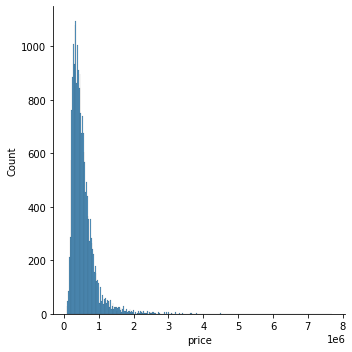

In [19]:
plt.figure(figsize=(12,6))
sns.displot(df['price']);

We can see from the above chart, most of the house price fall between 0 to 2,000,000 USD. There are a few outliers which is beyond those prices. So realistically, we may want to drop those outliers as there are not so much houses with those price range in the market and it won't be very useful for our model's predictions.

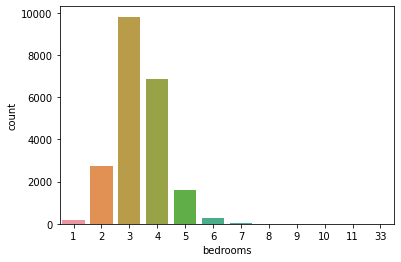

In [20]:
sns.countplot(data=df, x=df['bedrooms']);

Most of the houses have either 3 or 4 bedrooms. On extreme ends, there are some houses with 1 bedroom or 33 bedrooms.

In [21]:
# check the correlation
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Seem like `sqft_living` is highly correlated with `price`. so what we can do is further explore those features using `scatterplot`.


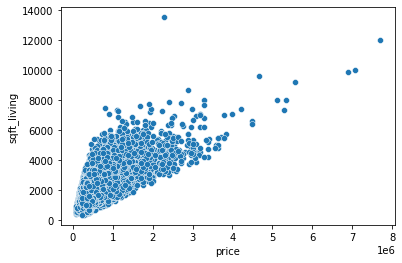

In [22]:
sns.scatterplot(data=df, x='price', y='sqft_living');

We can see a strong positive linear relationship.


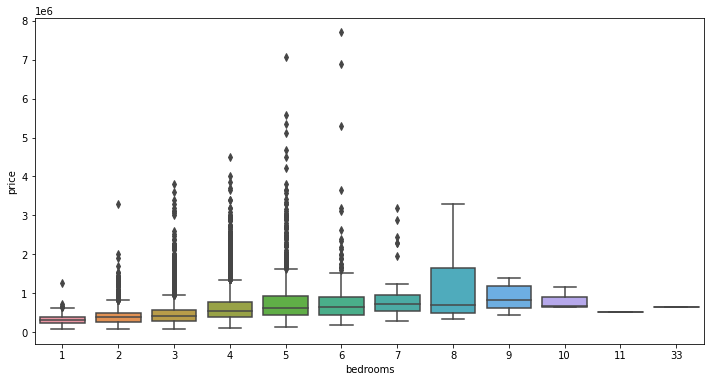

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='bedrooms', y='price');

As we already know majority of houses have bedrooms between 4 - 7, there are variety of prices for those range. 

## Geographical Properties

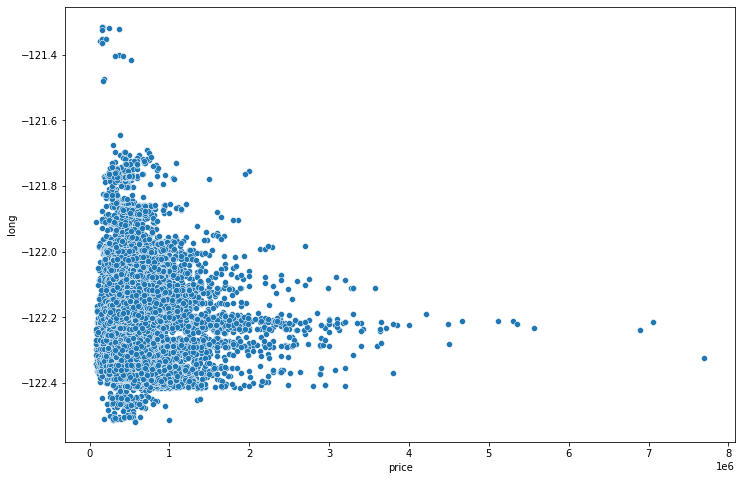

In [24]:
# let's see price distribution for lat, long
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='long');

We can see that around `long: -122.2`, there seem to be expensive houses. Becuase prices are much higher for those `long` values.

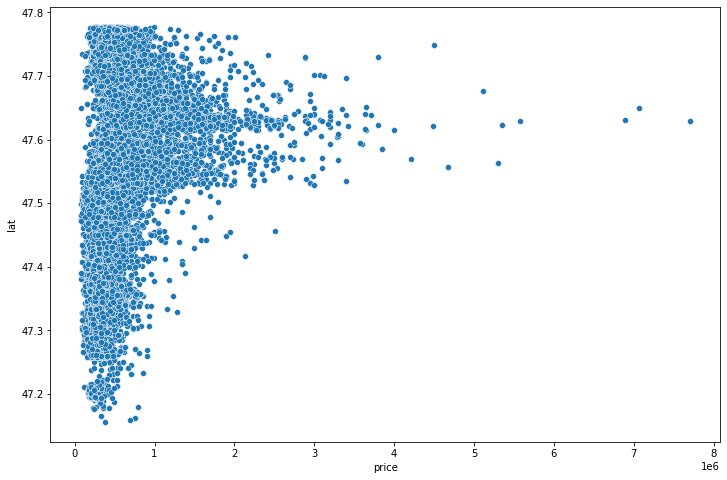

In [25]:
# let's see price distribution for lat, long
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='price', y='lat');

There is same behaviour with `lat` too. There are some sort of expensive houses between 47.6 and 47.7.

## Exploring for price hotspots

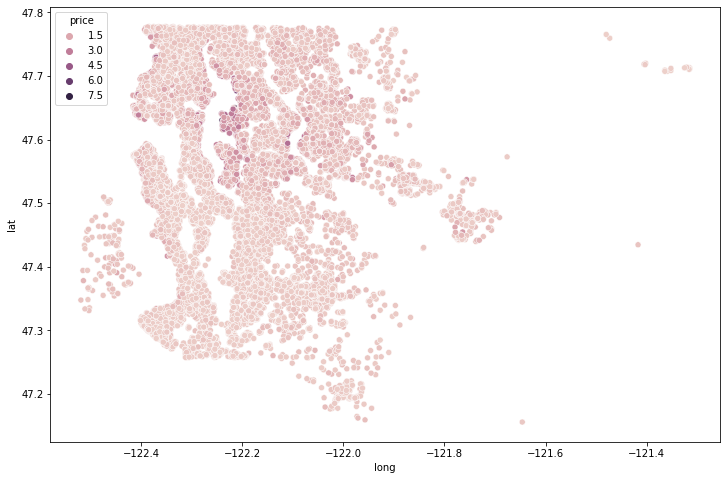

In [26]:
# putting hotspot for the area

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price');

We can see that there are some hotspot areas. However, the distribution is not very clear.

In [27]:
# let's check the Top 20 most expensive houses
df.sort_values(by='price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


We can see that maximum house price is around 7.7 millions and the price quickly drop to the range of 3 millions. So we can set the cut off point at 3 millions as there are not so much houses beyond those price ranges.

---



In [28]:
len(df) * 0.01

215.97

If we calculate TOP 1% of houses, there are about 216 houses. 

As our scatterplot hotspot is impacted by those outliers, we want to exclude those outliers houses when we do the visual exploration.

So let's create a dataframe excluding those Top 1 % houses, meaning we will be grabbing bottom 99% houses.

In [29]:
# Let's create non-top 1 % houses (bottom 99%)
non_top_1_perc = df.sort_values(by='price', ascending=False).iloc[216:] # will grab houses from index of 216 onwards


In [30]:
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


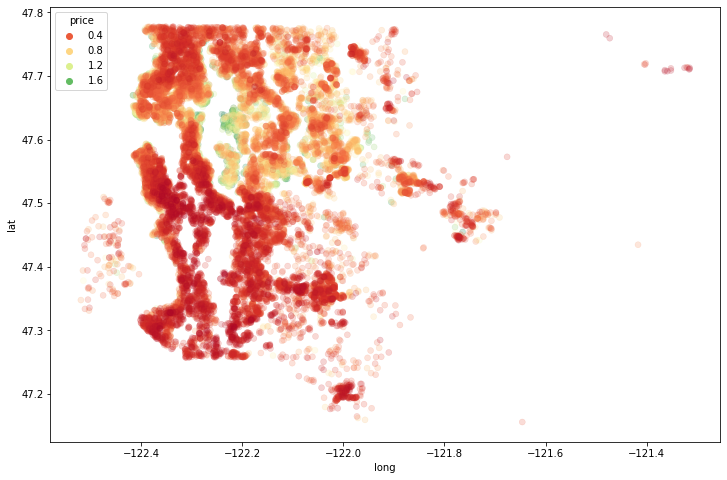

In [31]:
# let's plot again

plt.figure(figsize=(12,8))
sns.scatterplot(data=non_top_1_perc, x='long', y='lat', hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn');  # palette: Red => Yellow => Green 

Now we can see a lot clearer color distribution (no longer influenced by those expensive outliers hourses).

## Other Features

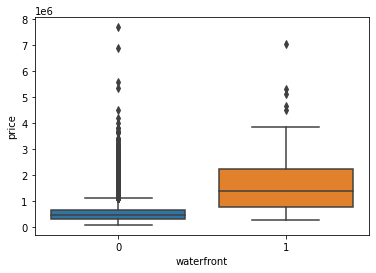

In [32]:
sns.boxplot(data=df, x='waterfront', y='price');

we can see that on average, Water Front houses are much more expensive than Non Water Front houses which make sense.

# Feature Engineering - Working with Feature Data

In [33]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Id column is not really helpful for us, so we will drop it

In [35]:
# Id column is not really helpful for us, so we will drop it
df = df.drop('id', axis=1)

### Feature Engineering from Date

In [36]:
# Date column
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

We can see that `date` column is object type and we can convert it to datetime type.

In this way, we can extract date related information easily.

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [39]:
# Extracting information from date column
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [40]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


### Explore whether there is any seasonal sales related to Month 

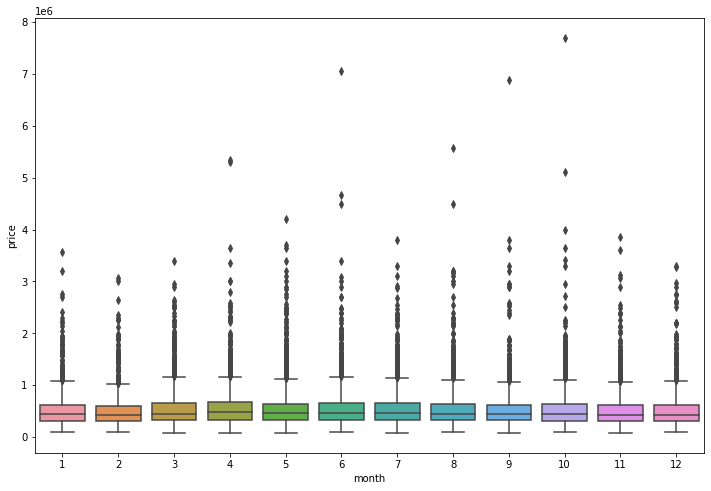

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='month', y='price');

From the boxplot itself, it is hard to tell whether for specific month, price is more expensive.

So let's look at the data itself.

In [42]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

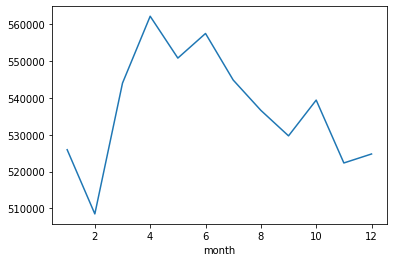

In [43]:
df.groupby('month').mean()['price'].plot();

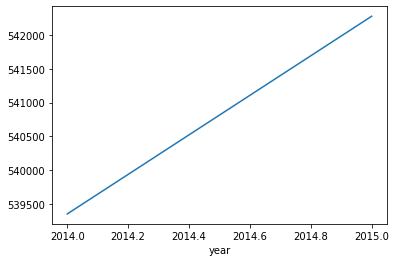

In [44]:
df.groupby('year').mean()['price'].plot();

As the date column is no longer necessary, we will drop it.

In [45]:
df = df.drop('date', axis=1)

In [46]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


### Zipcode column

In [47]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

What we can further do is to map the expensive zip codes and inexpensive zip code areas categories. For this one, it will be helpful to approach domain expert.

In [48]:
# for this project, we will drop zipcode.

df = df.drop('zipcode', axis=1)

### yr_renovated column

We can see there a lot of houses have `0` value which indicate `no rennovation`. So it makes more sense to have `has renovate: YES/NO` value rather than the year iteself. 

However on the flip side, we can intuitively think that `more recently renovated houses will have higher values`. Those houses are associated with high number of year. The smaller the year value (meaning the not very recently renovated), it is likely that prices can be lower. So for NO RENOVATION HOUSES with 0 value is alinged with it.  0 => 1944 => 2000 => 2014, the price can get higher.

So we don't really need to make any changes for this column and leave it like that.

In [49]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### sqft_basement

There is a similar situation with `sqft_basement` column too.

In [50]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [53]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12


# Scaling and Train Test Split

In [55]:
# separate Features and Labels
# tensor can only work with numeric array, not with pandas series or dataframe

X = df.drop('price', axis=1).values
y = df['price'].values

In [57]:
# X[:5]

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling

In [61]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
X_train.shape

(15117, 19)

**We can see that there are 19 incoming features, so it is best to have at least 19 neurons in our model.**

In [65]:
model = Sequential()

In [70]:
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))

 # output layer
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

## Training the Model

### Why passing `validation data` is good?

* When fitting the model, validation data can be passed too.

* What it means is after each epoch training on training data, it gonna quickly run the test data and check our loss on the test data. 

* In this way, we can keep a tracking of how well performing our model not just on our training data, but also on test data.

* But Keep in mind that this test data will not have any impact on weights and bias of our network.

---------

### `batch_size`
* NOTE: for `batch_size`, it is typical to use `2^(n)` values like 64, 128, etc. 
* the smaller the batch_size, the longer it takes to train. However, it is likely to overfit your data because you are not passing your entire dataset at once. Instead, you are focusing on smaller batches.

In [72]:
# fit the model
model.fit(x=X_train, 
              y=y_train, 
              validation_data=(X_test, y_test),
              batch_size=128, 
              epochs=400,
              verbose=1)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 218128236544.0000 - val_loss: 138021961728.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 112924753920.0000 - val_loss: 96608739328.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 99145252864.0000 - val_loss: 95024709632.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 97503764480.0000 - val_loss: 93512933376.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 95903875072.0000 - val_loss: 92009783296.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 94280417280.0000 - val_loss: 90397671424.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 92589801472.0000 - val_loss: 88735252480.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 90890002432.0000 - val_loss: 87188144128.0000
Epoch 9/400
119/119 [========

We can see that loss is getting smaller and smaller.

### Explore what our training history looks like and Whether it is overfitting or not


In [75]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,2.181282e+11,1.380220e+11
1,1.129248e+11,9.660874e+10
2,9.914525e+10,9.502471e+10
3,9.750376e+10,9.351293e+10
4,9.590388e+10,9.200978e+10


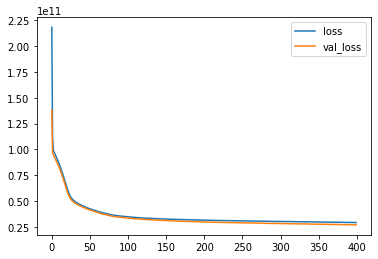

In [77]:
losses.plot();

We can see that there is no spike in `orange line (val_loss)`, we can probably continue training. However when we look at the val_loss, there is not much improvment and even the improvement value is very tiny after a certain epoch.

**NOTE: It is important to look for any spike, which indicates that our model is overfitting.**

# Evaluation on Test Data 

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

### Get predictions on Test Data

In [79]:
predictions = model.predict(X_test)

### Get evaluations of MAE, MSE, RMSE

In [80]:
mean_absolute_error(y_test, predictions)

102398.41599151235

In [81]:
mean_squared_error(y_test, predictions)

27024053171.35423

In [82]:
np.sqrt(mean_squared_error(y_test, predictions))

164389.94242761395

So we already have MAE, MSE, RMS. Are they good or bad?

We need to take into account of the mean value of the price.

In [84]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [85]:
5.402966e+05

540296.6

In [86]:
( 102398.41599151235 / 5.402966e+05 ) * 100

18.952259923810804

If we look at the ratio of MAE to average price of the house, we are off by around 19%. This is not Great, but not horrible either.

So w can use `explained_variance_score` to get deeper understading.


### explained_variance_score 

In [87]:
explained_variance_score(y_test, predictions)

0.7969530370976718

The best possible value is 1.0 and our is around 0.797. To see whether this is good or bad again, we need to look at the whole context.

If we have a previous model, we might want to compare this value to see whether our model is getting better or wrose.


### Visualization of True value and Predictions

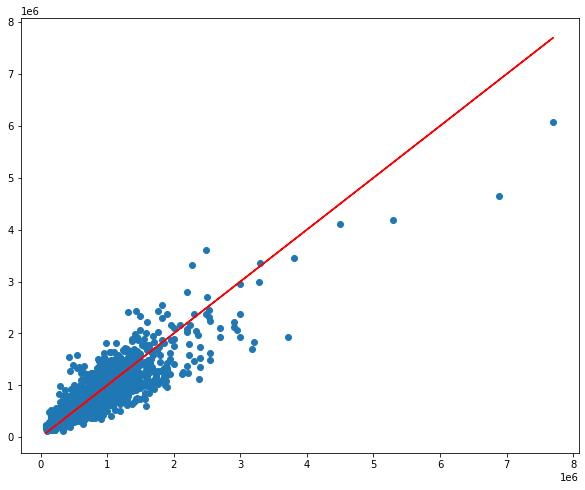

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, predictions);
plt.plot(y_test, y_test, color='r'); #perfect line

We can see that our model is generally performing well on houses of prices (0 - 2,000,000 USD). But for very expensive houses, our model is not really doing well.

# Predictions on Brand New House

In [96]:
# let's use the very first house
new_house = df.drop('price', axis=1).iloc[0]

new_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [98]:
new_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

We can see that shape is is still not correct. So we need to reshape it.

-1 means keep those old dimensions along that axis.

In [99]:
new_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [100]:
# as our model is trained on scale data, we need to scale the features too.
new_house = scaler.transform(new_house.values.reshape(-1,19))

In [101]:
# make a prediction
model.predict(new_house)

array([[290164.16]], dtype=float32)

In [102]:
# true value
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


It seem like our model is overshooting.


What we can further do is 
* drop those extreme 1 or 2 expensive houses.
* retrain the model and check whether MAE value is reduced or not.